In [ ]:
!pip install langchain

In [ ]:
!pip install ctransformers

In [ ]:
from langchain.llms import CTransformers

# Local CTransformers model
llm = CTransformers(model='models/llama-2-7b-chat.ggmlv3.q8_0.bin',
                    model_type='llama',
                    config={'max_new_tokens': 256,
                            'temperature': 0.01}
                    )
prediction = llm.predict("Hi!, can you tell me the distance to the sun?")
print(prediction)

In [ ]:
list1 = ['At', 'this', 'point', 'we', 'rage', 'quit', 'and', 'I', 'sent', 'him', 'a', 'message', 'begging', 'him', 'to', 'watch', 'a', 'YouTube', 'walkthrough', 'on', 'Cataclysm', 'before', 'playing', 'again', '.']

In [ ]:
len(list1)

25

In [ ]:
import json

input_file_path = '/content/test.json'
output_file_path = '/content/mimic_texts.txt'

with open(input_file_path, 'r', encoding='utf-8') as infile, open(output_file_path, 'w', encoding='utf-8') as outfile:
    for line in infile:
        data = json.loads(line)
        # Convert the list directly to string including brackets, quotes, etc.
        text_str = str(data['text']).replace('"', "'")
        outfile.write(text_str + '\n')

print(f"Texts have been successfully saved to {output_file_path}")



Texts have been successfully saved to /content/mimic_texts.txt


In [ ]:
import json

# Paths to your files
json_file_path = '/content/test-gpt.json'  # Update this path
txt_file_path = '/content/ncbi_pred0.txt'  # Update this path

# Open both files
with open(json_file_path, 'r', encoding='utf-8') as json_file, open(txt_file_path, 'r', encoding='utf-8') as txt_file:
    for i in range(30):
        # Read and parse a line from the JSON file
        json_line = json.loads(json_file.readline())
        json_text = json_line['text']
        json_label_len = len(json_line['label'])

        # Read and evaluate a line from the TXT file
        txt_line = txt_file.readline().strip()
        pred_label_len = len(eval(txt_line))

        # Compare lengths and print the JSON text if they don't match
        if json_label_len != pred_label_len:
            print(f"Line {i+1} length mismatch. Text: {json.dumps(json_text)}")
            print(f"JSON label length: {json_label_len}")
            print(f"TXT label length: {pred_label_len}")

# Note: Please ensure the paths to the JSON and TXT files are correctly specified.


SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<string>, line 1)

In [ ]:
import json

# Paths to your files
json_file_path = '/content/test-gpt.json'  # Update this path
txt_file_path = '/content/ncbi_length.txt'

with open(json_file_path, 'r', encoding='utf-8') as json_file, open(txt_file_path, 'w', encoding='utf-8') as txt_file:
      # Read and parse a line from the JSON file
      for i in range(210):
        json_line = json.loads(json_file.readline())
        json_text = json_line['text']
        json_label_len = len(json_line['label'])
        #print()

        #txt_line = txt_file.readline().strip()
        #pred_label_len = len(eval(txt_line))

        txt_file.write(str(i+1)+"\t"+ str(json_label_len) + '\n')

# Note: Please ensure the paths to the JSON and TXT files are correctly specified.

In [ ]:
with open("/content/ncbi_pred0.txt","r") as f:
    lines = f.readlines()
    #line = lines.strip("]")
    for line in lines:
        list_line = line[1:-1].split("][")
        for one_line in list_line:
            if one_line != "":
                #print(one_line)
                tokens = one_line.strip("'").split("', '")

                # Extracting labels
                labels = [token.split('-')[-1] for token in tokens]
                print(len(labels),labels)

12 ['DiseaseClass', 'Modifier', 'Modifier', 'O', 'SpecificDisease', 'O', 'SpecificDisease', 'O', 'O', 'O', 'O', 'O.']
25 ['DiseaseClass', 'SpecificDisease', 'O', 'O', 'SpecificDisease', 'SpecificDisease', 'O', 'O', 'O', 'Modifier', 'SpecificDisease', 'O', 'SpecificDisease', 'SpecificDisease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'SpecificDisease', 'O']
22 ['O', 'O', 'DiseaseClass', 'O', 'O', 'SpecificDisease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
24 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
19 ['O', 'O', 'DiseaseClass', 'DiseaseClass', 'O', 'SpecificDisease', 'O', 'O', 'Modifier', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'O', 'O']
11 ['SpecificDisease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease.']
21 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'O', 'O', 'O', 'SpecificDisease', 'O', 

In [ ]:
labels = [token.split('-')[-1] for token in tokens]
#labels = [token.split('-')[-1] for token in one_line]
print(len(labels),labels)

17 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'Clinical Impacts', 'O', 'Clinical Impacts', 'O', 'Clinical Impacts', 'O', 'Clinical Impacts', 'O']


In [ ]:
import ast

pred_file_path = "/content/ncbi_pred0.txt"

# Set of allowed labels
allowed_labels = {"O", "Social Impacts", "Clinical Impacts"}

# Read the file and check each line
with open(pred_file_path, 'r', encoding='utf-8') as file:
    for line_number, line in enumerate(file, 1):
        # Convert the line to a list of labels
        #print(line)
        actual_line = ast.literal_eval(line)
        #print(line_number)
        #labels = eval(line.strip())
        # Check if there are any labels not in the allowed set
        for label in actual_line:
          #print()
          if label not in allowed_labels:
            print('false')



In [ ]:
# Open the files
with open("/content/ncbi_pred0.txt", "r") as preds_file, \
    open("/content/ncbi_length.txt", "r") as length_file, \
    open("/content/pred4.txt", "r") as pred4_file, \
    open("/content/output_ncbi0.txt", "w") as output_file:

    # Read lines from each file
    #preds_lines = preds_file.readlines()
    length_lines = length_file.readlines()
    #pred4_lines = pred4_file.readlines()

    # Iterate through the lines
    lines = preds_file.readlines()
    #line = lines.strip("]")
    #print(length_lines)
    i = 0
    for line in lines:
        list_line = line[1:-1].split("][")
        #print(length_lines[i])
        for one_line in list_line:
            if one_line != "":
                #print(one_line)
                tokens = one_line.strip("'").split("', '")

                # Extracting labels
                labels = [token.split('-')[-1] for token in tokens]
                #print(len(labels),labels)

                # Get the length from the length file
                length = int(length_lines[i].strip("\n").split("\t")[1])
                #print(i, len(labels),length, labels)

                # Check the condition and write to the output file
                if len(labels) == length:
                    output_file.write(' '.join(labels) + '\n')
                else:
                    print(i, len(labels),length, labels)
                    #pred4_labels = pred4_lines[i].strip().split(', ')
                    o_labels = length * ['O']
                    output_file.write(' '.join(o_labels) + '\n')

                i+=1

                """if(i==38):
                  pred4_labels = pred4_lines[39].strip().split(', ')
                  output_file.write(' '.join(pred4_labels) + '\n')
                  i = i+2
                elif(i==40):
                  pred4_labels = pred4_lines[41].strip().split(', ')
                  output_file.write(' '.join(pred4_labels) + '\n')
                  pred4_labels = pred4_lines[42].strip().split(', ')
                  output_file.write(' '.join(pred4_labels) + '\n')
                  i = i+3
                else:
                  i += 1"""

print("Labels have been written to output_labels.txt")


1 25 24 ['DiseaseClass', 'SpecificDisease', 'O', 'O', 'SpecificDisease', 'SpecificDisease', 'O', 'O', 'O', 'Modifier', 'SpecificDisease', 'O', 'SpecificDisease', 'SpecificDisease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'SpecificDisease', 'O']
3 24 23 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
4 19 20 ['O', 'O', 'DiseaseClass', 'DiseaseClass', 'O', 'SpecificDisease', 'O', 'O', 'Modifier', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'O', 'O']
5 11 12 ['SpecificDisease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease.']
6 21 20 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'O', 'O', 'O', 'SpecificDisease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
10 20 17 ['O', 'O', 'O', 'O', 'O', 'SpecificDisease', 'O', 'SpecificDisease', 'O', 'O', 'O', 'O', 'SpecificDisease', 'O', 'SpecificDisease', 'O', 'O', 'O', 'O', 'O']
11 76 63 ['DiseaseClass', 'Dise

In [ ]:
o_labels = 2 * ['O']
o_labels

['O', 'O']

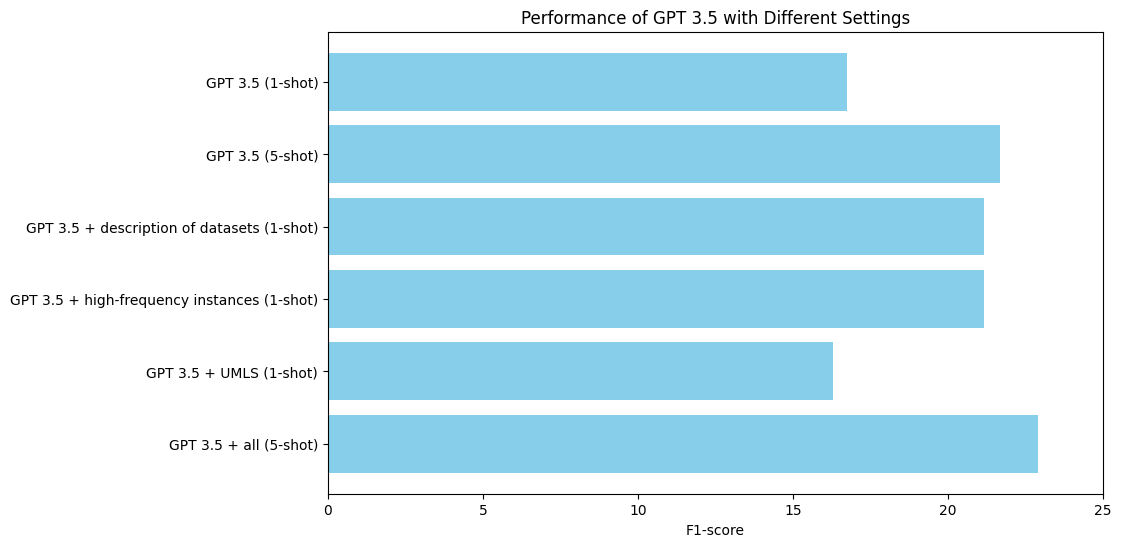

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['GPT 3.5 (1-shot)', 'GPT 3.5 (5-shot)', 'GPT 3.5 + description of datasets (1-shot)',
          'GPT 3.5 + high-frequency instances (1-shot)', 'GPT 3.5 + UMLS (1-shot)', 'GPT 3.5 + all (5-shot)']
f1_scores = [16.73, 21.69, 21.15, 21.15, 16.29, 22.90]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(models, f1_scores, color='skyblue')
plt.xlabel('F1-score')
plt.title('Performance of GPT-3.5 with Different Prompts.')
plt.xlim(0, 25)
plt.gca().invert_yaxis()  # To display the highest score at the top

plt.show()


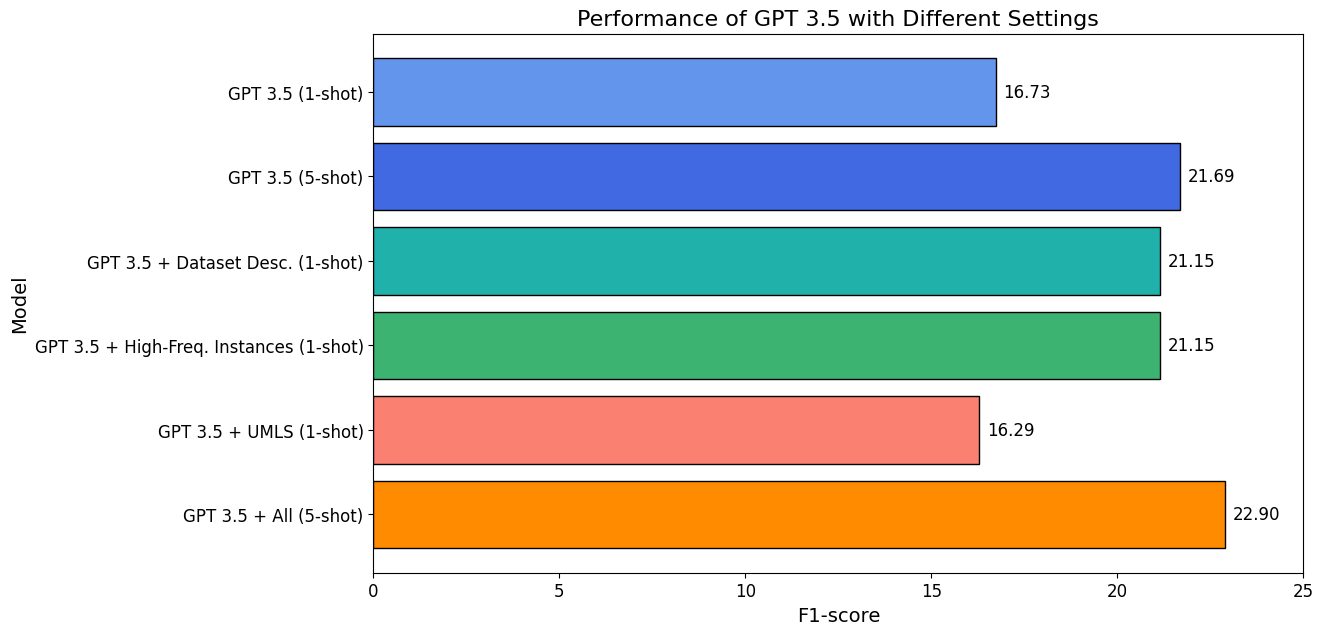

In [ ]:
import matplotlib.pyplot as plt

# Improved data visualization
models = ['GPT 3.5 (1-shot)', 'GPT 3.5 (5-shot)', 'GPT 3.5 + Dataset Desc. (1-shot)',
          'GPT 3.5 + High-Freq. Instances (1-shot)', 'GPT 3.5 + UMLS (1-shot)', 'GPT 3.5 + All (5-shot)']
f1_scores = [16.73, 21.69, 21.15, 21.15, 16.29, 22.90]
colors = ['cornflowerblue', 'royalblue', 'lightseagreen', 'mediumseagreen', 'salmon', 'darkorange']

# Enhanced plotting
plt.figure(figsize=(12, 7))
bars = plt.barh(models, f1_scores, color=colors, edgecolor='black')
plt.xlabel('F1-score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Performance of GPT 3.5 with Different Settings', fontsize=16)
plt.xlim(0, 25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # To display the highest score at the top

# Annotate bars with F1-scores
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', fontsize=12)

plt.show()


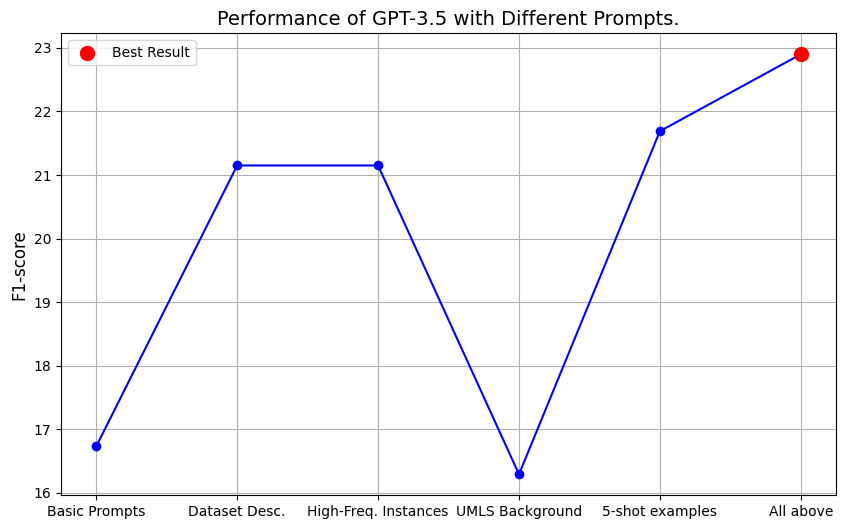

In [ ]:
import matplotlib.pyplot as plt

# Data
settings = ['Basic Prompts', 'Dataset Desc.', 'High-Freq. Instances', 'UMLS Background', '5-shot examples', 'All above']
f1_scores = [16.73, 21.15,  21.15, 16.29, 21.69,22.90]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(settings, f1_scores, marker='o', linestyle='-', color='b')
#plt.xlabel('Settings', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('Performance of GPT-3.5 with Different Prompts.', fontsize=14)
plt.grid(True)

# Highlight the best result
best_score_index = f1_scores.index(max(f1_scores))
plt.scatter(settings[best_score_index], f1_scores[best_score_index], color='red', s=100, label='Best Result', zorder=5)
plt.legend()

plt.show()


In [ ]:
with open("/content/train-5-shot.txt","r") as f:
  with open("/content/train-5-shot.json","a") as wf:
    text = f.readlines()
    word = []
    label = []
    for line in text:
      if(line=="\n"):
        wf.write('{"text": [')
        count = 0
        for w in word:
          count+=1
          if(count!=len(word)):
            wf.write('"'+w+'", ')
          else:
            wf.write('"'+w+'"')
        wf.write('], "label": [')
        count = 0
        for l in label:
          count+=1
          if(count!=len(label)):
            wf.write('"'+l+'", ')
          else:
            wf.write('"'+l+'"')
        wf.write(']}' +"\n")
        word = []
        label = []
      else:
        new_line = line.strip("\n").split(" ")
        word.append(new_line[0])
        label.append(new_line[1])

In [ ]:
def format_text_label(data):
    text = data['text']
    label = data['label']
    formatted_list = [f'{word}-{label[i].replace("_", " ")}' if label[i] != 'O' else f'{word}-O' for i, word in enumerate(text)]
    return formatted_list

data = {
    'text': ["killed", "my", "stomach", "."],
    'label':[]
}

result = format_text_label(data)
print(result)


['Because-O', 'of-O', 'this-O', 'situation-O', ',-O', 'I-Social Impacts', 'lost-Social Impacts', 'my-Social Impacts', 'best-Social Impacts', 'friend-Social Impacts', '.-O']


In [ ]:
# Change "" to '' in a list of strings
textt = ["killed", "my", "stomach", "."]

for i in range(len(textt)):
  textt[i] = textt[i].replace('"', "'")

print(textt)

['Because', 'of', 'this', 'situation', ',', 'I', 'lost', 'my', 'best', 'friend', '.']


In [ ]:
with open("/content/pred-llama3.txt","r") as f:
  with open("/content/test_texts4.txt","r") as f1,\
  open("/content/pred-llama3.txt", "r") as f2,\
  open("/content/output_llama_impacts1.txt", "w") as output_file:

    #length_lines = length_file.readlines()
    lines = f.readlines()
    count = 0
    i = 0
    lines1 = f1.readlines()
    lines2 = f2.readlines()
    for line in lines:
      #print(lines2[i])
      line = line.strip("\n")
      #print(line)
      tokens = line.strip("'").split("', '")
      labels = [token.split('-')[-1] for token in tokens]
      words = [token.split('-')[:-1] for token in tokens]
      #if(len(labels)>1):
       # count = count + 1
       # print(lines1[count-1])
       # print(words)
      #length = int(length_lines[i].strip("\n").split("\t")[1])
      #print(i, len(labels),length, labels)

      # Check the condition and write to the output file
      length_line = len(lines1[i].split("', '"))
      #print(i)
      if len(labels) == length_line:
          #output_file.write(' '.join(labels) + '\n')
          output_file.write(line + "\n")
          #continue
      else:
          count = count + 1
          #print(i, len(labels), length_line,labels)
          print(i, len(labels),length_line)
          print(lines1[i].strip("\n"))
          print(line.strip("\n"))
          print("\n")
          #output_file.write(lines2[i])
          #pred4_labels = pred4_lines[i].strip().split(', ')
          #o_labels = length * ['O']
          #output_file.write(' '.join(o_labels) + '\n')

      i = i + 1
      """list_line = line[1:-1].split("][")
      for one_line in list_line:
          if one_line != "":
              #print(one_line)
              tokens = one_line.strip("'").split("', '")

              # Extracting labels
              labels = [token.split('-')[-1] for token in tokens]
              print(len(labels),labels)"""

    print(count)

39 9 7
[submission_subreddit', ',', ',', 'battlestations', 'Congratulations', '!', '!']
['submission_subreddit-O', ',-O', ',-O', ',-O', ',-O', 'battlestations-O', 'Congratulations-O', '.-O', '!-O']


51 50 48
['Wouldn', '’', 't', 'be', 'worth', 'it', 'imo', 'x', 'x', 'submission_title', ',', ',', 'Its', 'okay', 'if', 'you', 'outgrown', 'JRE', 'submission_subreddit', ',', ',', 'JoeRogan', 'But', 'it', 'isn', '’', 't', 'just', 'him', 'letting', 'guests', 'get', 'their', 'opinions', 'out', ',', 'he', 'adds', 'onto', 'their', 'opinions', 'like', 'he', 'fully', 'agrees', 'with', 'them', '.']
['Wouldn-O', '‚‚-O', 't-O', 'be-O', 'worth-O', 'it-O', 'imo-O', 'x-O', 'x-O', 'submission_title-O', ',-O', ',-O', ',-O', 'Its-O', 'okay-O', 'if-O', 'you-O', 'outgrown-O', 'JRE-O', 'submission_subreddit-O', ',-O', ',-O', ',-O', 'JoeRogan-O', 'But-O', 'it-O', 'isn-O', '‚‚-O', 't-O', 'just-O', 'him-O', 'letting-O', 'guests-O', 'get-O', 'their-O', 'opinions-O', 'out-O', ',-O', 'he-O', 'adds-O', 'onto-O', 't

In [ ]:
with open("/content/pred-llama3.txt", "r") as preds_file,\
  open("/content/output_impacts-20shot-llama3.txt", "w") as output_file:
    lines = preds_file.readlines()
      #line = lines.strip("]")
      #print(length_lines)
    i = 0
    for line in lines:
      tokens = line.strip("'").split("', '")

      # Extracting labels
      labels = [token.split('-')[-1] for token in tokens]
      #print(len(labels),labels)
      output_file.write(' '.join(labels) + '\n')